### This notebook shows the usage of the light curve package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from light_curve import create_lc, gp_interpolation

In [2]:
%config InlineBackend.figure_format ='retina'

In [3]:
# ===== SN at work ==== #
# ===================== #

# Details of the object under study

Object = 'SN2011aa'
Host = 'PGC021381'
RA = '07:36:42.63'
DEC = '+74:26:34.80'
z = 0.013
EB_V_Gal = 0.065              # Na ID around maximum (Turatto 2003)
EB_V_Gal_err = 0.003
EB_V_Host = 0.0               # Schlafly & Finkbeiner 2011
EB_V_Host_err = 0.0
DM = 33.75
DM_err = 0.27                 # modz  http://leda.univ-lyon1.fr/ledacat.cgi?o=PGC%20021381
JD_offset = 2455000   

In [4]:
object_dir = '/Users/anirbandutta/Documents/SN2011aa_Work/SN2011_Anirban/Photometry/'

optical_mag = object_dir + '2011aa_ubvri_mag'
uvoptical_mag = object_dir + '2011aa_uvot_mag'

In [5]:
# create a light curve class
lc = create_lc(optical_mag)

In [6]:
# Know your data  bit
# transform from your data table from a wide format to long format
sn_df = lc.column_to_row(offset = 2455000.0)
sn_df = sn_df[sn_df['MAG'] != 99.99]
print (sn_df)

              JD FILTER     MAG   MERR
0    2455601.327      U  14.696  0.033
1    2455602.413      U  14.549  0.069
2    2455603.352      U  14.478  0.016
3    2455604.220      U  14.415  0.032
5    2455610.188      U  14.201  0.069
..           ...    ...     ...    ...
183  2455681.221      I  16.201  0.017
184  2455685.164      I  16.401  0.017
185  2455694.115      I  16.833  0.018
186  2455701.095      I  17.089  0.014
188  2455726.122      I  18.398  0.032

[175 rows x 4 columns]


In [7]:
# interpolate the B-band to know the B-band maximum, JD at maximum
interp = gp_interpolation(sn_df, 'B', supernova='SN2011aa')

You are working on SN2011aa
The following are the interpolated values for the band B 
JD at maximum = 2455611.646776 
Mag at maximum = 14.715972 +/- 0.008434
dm15 = 0.593009 +/- 0.013154


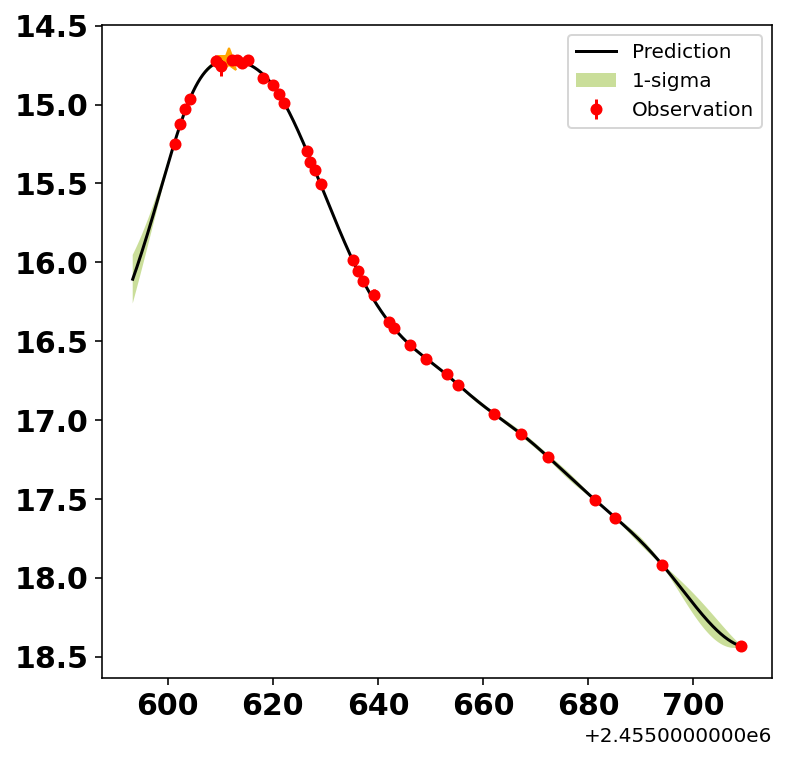

In [8]:
# Parameters of gp fit.
params = interp.interpolate_lc(verbose=True, amp=None, scale=30, diff_deg=2, plot_interp=True,
                              find_two_peaks=False)

In [9]:
# get the rest frame df 
# (t-t0)/(1+z) to first order
rest_frame_df = lc.restframe(t0=2455611.65, z=z, epoch=0.0, mode='column')
rest_frame_df = rest_frame_df[rest_frame_df['MAG'] != 99.99]

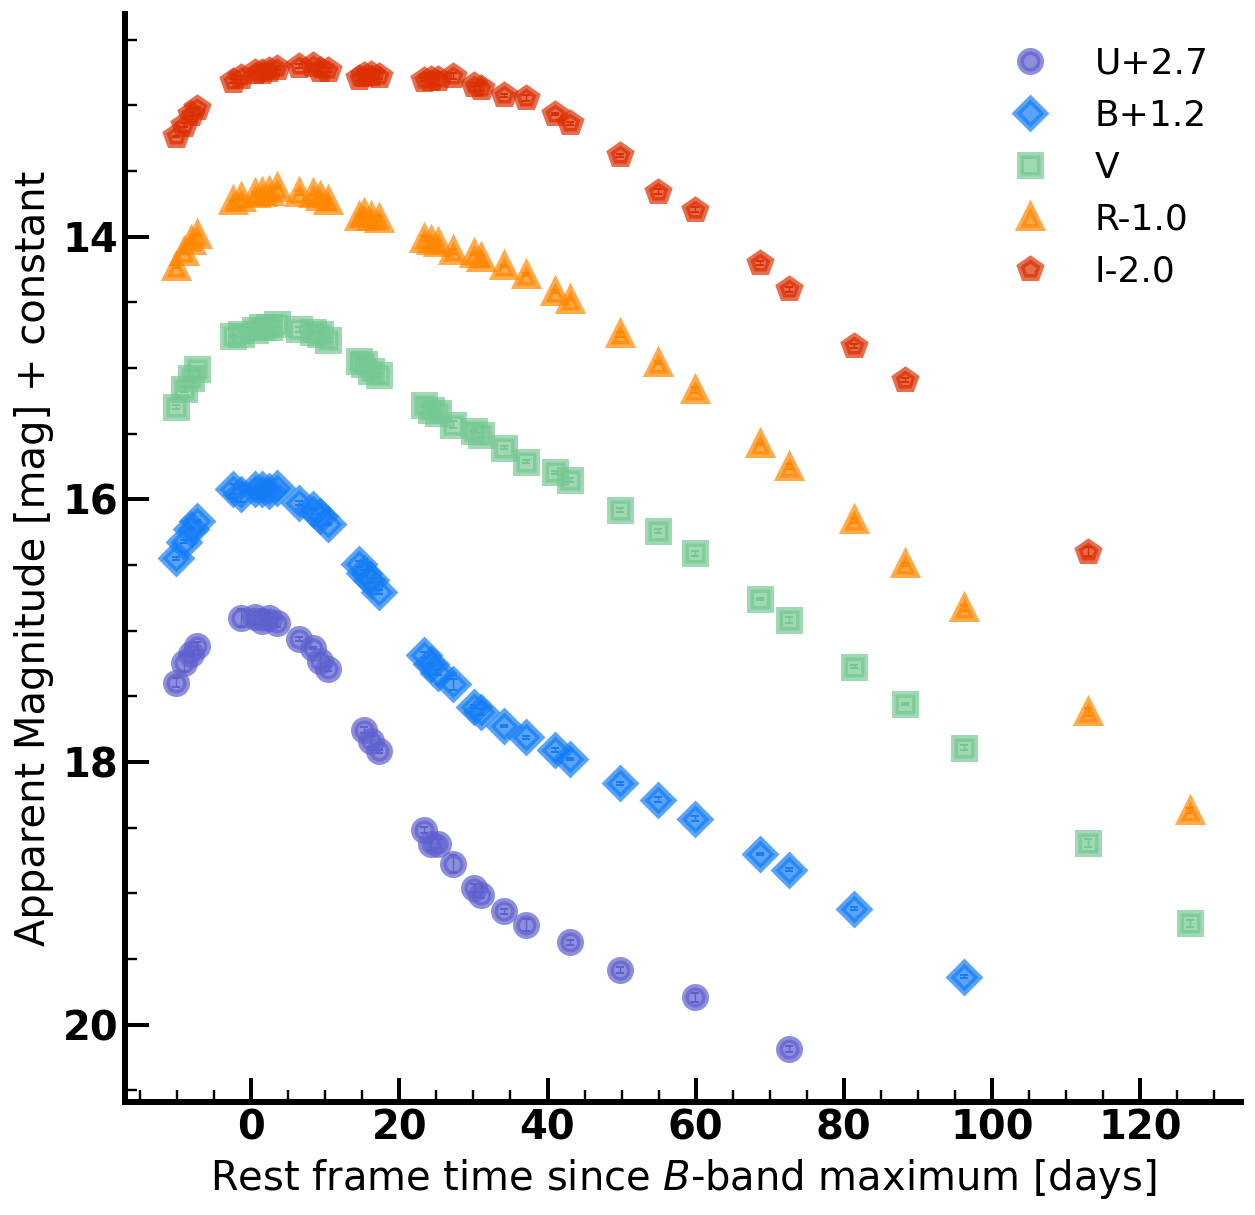

In [11]:
# plot the light curves
lc.plot_lc(rest_frame_df)

In [8]:
color_df = lc.color(sn_df, color='B-V', ebv_Gal=EB_V_Gal, ebv_Gerr=EB_V_Gal_err, ebv_host=0.0, ebv_herr=0.0)

In [10]:
color_df['Phase'] = color_df['JD'].apply(lambda x: x - 2455611.65)

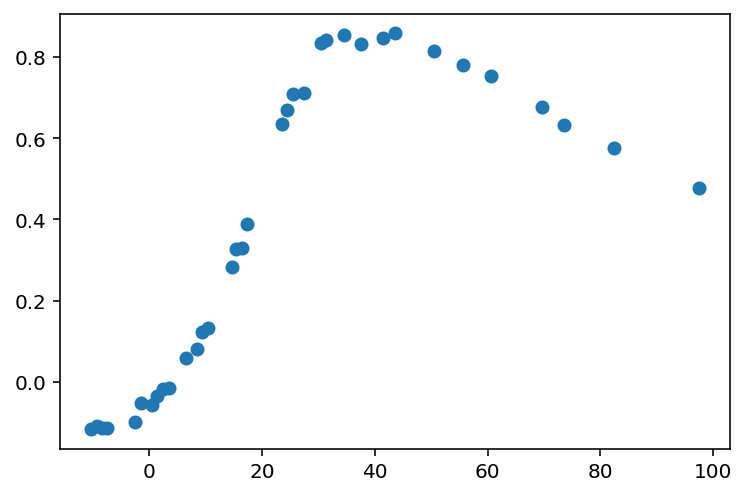

In [12]:
plt.plot(color_df['Phase'], color_df['B-V'], 'o')